In [22]:
def average(lst):
    return sum(lst)/len(lst)

def deviation(lst):
    avg = average(lst)
    deviation_lst = [(value-avg)**2 for value in lst]
    return sqrt(average(deviation_lst))

           2
0.0005608 x - 0.2692 x + 39.44
average temp: 17.27°C
temp std: 9.86°C
Dette forteller oss at gjennomsnittet for temperaturen er 17.27 °C, 
og at temperaturen varierte med ca. 9.86 fra gjennomsnittet


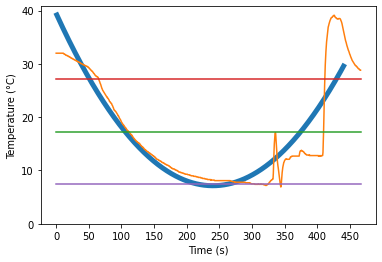

In [50]:
import csv
from pylab import *
import numpy

time_key = 'Time (s) Run 2'
temp_key = 'Temperature (Â°C) Run 2'

dt = 0.5
regression_to = 440

with open('ExportedData.csv') as f:
    reader = csv.DictReader(f)
    dics = [dic for dic in reader]

    n = len(dics)
    end_time = round(float(dics[-1][time_key]))

    times = [float(dic[time_key]) for dic in dics]
    temps = [float(dic[temp_key]) for dic in dics]

    avg_temp = round(average(temps), 2)
    std_temp = round(deviation(temps), 2)

    to_index = round(regression_to / dt)
    regression = numpy.poly1d(numpy.polyfit(times[:to_index], temps[:to_index], 2))
    print(regression)

    print(f'average temp: {avg_temp}°C')
    print(f'temp std: {std_temp}°C')

    print(f'Dette forteller oss at gjennomsnittet for temperaturen er {avg_temp} °C, ')
    print(f'og at temperaturen varierte med ca. {std_temp} fra gjennomsnittet')

    myline = numpy.linspace(1, regression_to, regression_to * 10)

    plot(myline, regression(myline), linewidth=5)

    plot(times, temps)
    plot(times, [avg_temp for _ in dics])
    plot(times, [avg_temp + std_temp for _ in dics])
    plot(times, [avg_temp - std_temp for _ in dics])

    xlabel('Time (s)')
    ylabel('Temperature (°C)')
    xticks(range(0, end_time, 50))
    yticks(range(0, 50, 10))

    show()